C:\Users\Asus\AppData\Local\Temp\ipykernel_22480\272257375.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


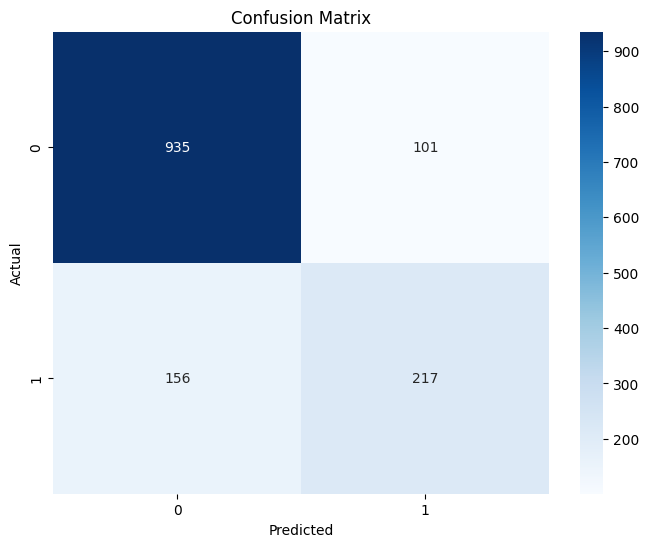

Accuracy: 0.8176011355571328
Precision: 0.6823899371069182
Recall: 0.5817694369973191
Feature Importance:
MonthlyCharges      0.666006
TotalCharges        0.582693
PaperlessBilling    0.357781
InternetService     0.225380
SeniorCitizen       0.185062
MultipleLines       0.073336
Partner             0.067386
PaymentMethod       0.059127
StreamingMovies     0.037696
StreamingTV        -0.012561
gender             -0.051506
DeviceProtection   -0.081108
OnlineBackup       -0.154447
Dependents         -0.181145
TechSupport        -0.255451
OnlineSecurity     -0.292157
Contract           -0.727390
PhoneService       -0.997720
tenure             -1.301445
dtype: float64


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Preparation
# 1. Handle missing values in Total Charges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# 2. Convert categorical variables to numerical form via encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# 3. Normalize numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Define features and target variable
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Report Findings
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Identify key features impacting churn (coefficients of logistic regression model)
feature_importance = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)